I. INTRODUCTION

The prices of new cars in the industry is fixed by the manufacturer with some additional costs incurred by the Government in the form of taxes. So customers buying a new car can be assured of the money they invest to be worthy. But due to the increased price of new cars and the incapability of customers to buy new cars due to the lack of funds, used cars sales are on a global increase. Predicting the prices of used cars is an interesting and much-needed problem to be addressed. Customers can be widely exploited by fixing unrealistic prices for the used cars and many falls into this trap. Therefore, rises an absolute necessity of a used car price prediction system to effectively determine the worthiness of the car using a variety of features. Due to the adverse pricing of cars and the nomadic nature of people in developed countries, the cars are mostly bought on a lease basis, where there is an agreement between the buyer and seller. These cars upon completion of the agreement are resold. So reselling has become an essential part of today’s world.

Given the description of used cars, the prediction of used cars is not an easy task. There are a variety of features of a car like the age of the car, its make, the origin of the car (the original country of the manufacturer), its mileage (the number of mildes it has run) and its horsepower. Due to rising fuel prices, fuel economy is also of prime importance. Other factors such as the type of fuel it uses, style, braking system, the volume of its cylinders (measured in cc), acceleration, the number of doors, safety index, size, weight, height, paint color, consumer reviews, prestigious awards won by the car manufacturer.

Other options such as sound system, air conditioner, power steering, cosmic wheels, GPS navigator all may influence the price as well.

In [10]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [11]:
from lightgbm import LGBMClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBClassifier
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor, RandomForestRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb

II. DATA SET AND PREPROCESSING

We use dataset from Kaggle for used car price prediction. The dataset contains various features that are required to predict and classify the range of prices of used cars.

In [12]:
data = pd.read_csv('train-data.csv')
test = pd.read_csv('test-data.csv')

In [13]:
data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [14]:
test.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1052
dtype: int64

In [15]:
data = data.drop('New_Price', axis=1)
data = data.drop('Unnamed: 0', axis=1)

test = test.drop('New_Price', axis=1)
test = test.drop('Unnamed: 0', axis=1)

In [16]:
data = data.dropna(how='any')
test = test.dropna(how='any')

In [17]:
data.shape

(5975, 12)

In [18]:
test.shape

(1223, 11)

For this dataset ưe found one point very interesting for the Name of the vehicle. We noticed that there weren't any rules for vehicle naming, and duting the prediction step, we reconigned that the names of the vehicles in train_data and test_data are very different and not predictable. We check the following:

In [19]:
listtrain = data['Name']
listtest = test['Name']

# prints the missing in listrain
print("Missing values in first list:", (set(listtest).difference(listtrain)))

Missing values in first list: {'Honda Amaze E i-DTEC', 'Datsun GO T Petrol', 'Chevrolet Sail Hatchback 1.2', 'Mahindra Scorpio VLX Special Edition BS-IV', 'Mahindra Xylo E9', 'Maruti 800 DX', 'BMW 7 Series 730Ld DPE Signature', 'Maruti SX4 ZXI AT', 'Hyundai Verna Transform SX VGT CRDi BS III', 'Tata Indica V2 DiCOR DLG BS-III', 'Hyundai i20 2015-2017 Magna Optional 1.4 CRDi', 'Hyundai Verna 1.4 CX', 'Ford Ikon 1.4 ZXi', 'Hyundai i20 2015-2017 1.4 CRDi Sportz', 'Mahindra Thar 4X4', 'Toyota Etios Liva VD', 'Volkswagen CrossPolo 1.2 TDI', 'Nissan 370Z AT', 'Maruti Alto XCITE', 'Land Rover Discovery 4 TDV6 Auto Diesel', 'BMW 7 Series 740i Sedan', 'Jaguar XF 2.0 Petrol Portfolio', 'Hyundai i20 1.4 Asta AT (O) with Sunroof', 'Chevrolet Enjoy 1.3 TCDi LTZ 7', 'Isuzu MU 7 4x2 HIPACK', 'Jeep Compass 1.4 Sport', 'Mahindra KUV 100 D75 K8 5Str', 'Tata Indica Vista Terra 1.2 Safire BS IV', 'Nissan Teana XL', 'Hyundai Creta 1.6 SX Diesel', 'Toyota Innova Crysta Touring Sport 2.4 MT', 'Land Rover Ran

Therefore, we decided to create a new column under the name "Cars" to distinguish the car make & model. We have noticed that some authors have used the coding of vehicle names by specifying each vehicle as a separate code and conducting train and prediction, which is probably not LOGICAL.

In [20]:
data['Cars'] = data['Name'].str.split(" ").str[0] + ' ' +data['Name'].str.split(" ").str[1]
test['Cars'] = test['Name'].str.split(" ").str[0] + ' ' +test['Name'].str.split(" ").str[1]

In [21]:
set(test['Cars']).issubset(set(data['Cars']))

False

Now, check again, and efectively, there are only 7 cars in the test data set are missing from the train data set. Fine, we drop these items.

In [22]:
listtrain = data['Cars']
listtest = test['Cars']

# prints the missing and additional elements in list1
print("Missing values in first list:", (set(listtest).difference(listtrain)))

Missing values in first list: {'Fiat Abarth', 'Toyota Land', 'Isuzu MU', 'Nissan 370Z', 'Hindustan Motors', 'Bentley Flying', 'OpelCorsa 1.4Gsi'}


In [23]:
test.drop(test[test['Cars'].isin(['Toyota Land', 'Hindustan Motors', 'Fiat Abarth', 'Nissan 370Z',
                                  'Isuzu MU', 'Bentley Flying', 'OpelCorsa 1.4Gsi'])].index, inplace = True)

In [24]:
test.shape

(1216, 12)

In [25]:
listtrain = data['Cars']
listtest = test['Cars']

# prints the missing and additional elements in list1
print("Missing values in first list:", (set(listtest).difference(listtrain)))

Missing values in first list: set()


In [26]:
data.head()

Name    Location  Year  Kilometers_Driven  \
0            Maruti Wagon R LXI CNG      Mumbai  2010              72000   
1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015              41000   
2                      Honda Jazz V     Chennai  2011              46000   
3                 Maruti Ertiga VDI     Chennai  2012              87000   
4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013              40670   

  Fuel_Type Transmission Owner_Type     Mileage   Engine      Power  Seats  \
0       CNG       Manual      First  26.6 km/kg   998 CC  58.16 bhp    5.0   
1    Diesel       Manual      First  19.67 kmpl  1582 CC  126.2 bhp    5.0   
2    Petrol       Manual      First   18.2 kmpl  1199 CC   88.7 bhp    5.0   
3    Diesel       Manual      First  20.77 kmpl  1248 CC  88.76 bhp    7.0   
4    Diesel    Automatic     Second   15.2 kmpl  1968 CC  140.8 bhp    5.0   

   Price           Cars  
0   1.75   Maruti Wagon  
1  12.50  Hyundai Creta  
2   4.50     Honda Jazz  
3   6.00  Maruti Ertiga  
4  17.74        Audi A4

Now, we will convert all data of columns "Mileage", "Engine", "Power", "Seats" into float.



In [27]:
data['Mileage'] = data['Mileage'].str.replace(' kmpl','')
data['Mileage'] = data['Mileage'].str.replace(' km/kg','')
data['Engine'] = data['Engine'].str.replace(' CC','')
data['Power'] = data['Power'].str.replace('null bhp','112')
data['Power'] = data['Power'].str.replace(' bhp','')

test['Mileage'] = test['Mileage'].str.replace(' kmpl','')
test['Mileage'] = test['Mileage'].str.replace(' km/kg','')
test['Engine'] = test['Engine'].str.replace(' CC','')
test['Power'] = test['Power'].str.replace('null bhp','112')
test['Power'] = test['Power'].str.replace(' bhp','')

In [28]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Cars                 0
dtype: int64

In [29]:
test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Cars                 0
dtype: int64

In [30]:
data.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
Cars                  object
dtype: object

In [31]:
data['Mileage'] = data['Mileage'].astype(float)
data['Mileage'] = data['Mileage'].astype(float)
data['Engine'] = data['Engine'].astype(float)
data['Power'] = data['Power'].astype(float)

test['Mileage'] = test['Mileage'].astype(float)
test['Mileage'] = test['Mileage'].astype(float)
test['Engine'] = test['Engine'].astype(float)
test['Power'] = test['Power'].astype(float)

In [32]:
data.describe()

Year  Kilometers_Driven      Mileage       Engine        Power  \
count  5975.000000       5.975000e+03  5975.000000  5975.000000  5975.000000   
mean   2013.386778       5.867431e+04    18.179408  1621.606695   113.254882   
std       3.247238       9.155851e+04     4.521801   601.036987    53.415632   
min    1998.000000       1.710000e+02     0.000000   624.000000    34.200000   
25%    2012.000000       3.390800e+04    15.200000  1198.000000    77.000000   
50%    2014.000000       5.300000e+04    18.160000  1493.000000    98.600000   
75%    2016.000000       7.300000e+04    21.100000  1984.000000   138.100000   
max    2019.000000       6.500000e+06    33.540000  5998.000000   560.000000   

             Seats        Price  
count  5975.000000  5975.000000  
mean      5.278828     9.501647  
std       0.808959    11.205736  
min       0.000000     0.440000  
25%       5.000000     3.500000  
50%       5.000000     5.650000  
75%       5.000000     9.950000  
max      10.000000   160.000000

In [33]:
feature = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
           'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']
data = pd.DataFrame(data, columns=feature)

feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']
test = pd.DataFrame(test, columns=feature1)

III. EXPLORATORY DATA ANALYSIS

After preprocessing the data, it is analyzed through visual exploration to gather insights about the model that can be applied to the data, understand the diversity in the data and the range of every field. We use a bar chart, box plot, distribution graph, etc. to explore each feature varies and its relation with other features including the target feature.

In [34]:
data.head()

Cars    Location  Year  Kilometers_Driven Fuel_Type Transmission  \
0   Maruti Wagon      Mumbai  2010              72000       CNG       Manual   
1  Hyundai Creta        Pune  2015              41000    Diesel       Manual   
2     Honda Jazz     Chennai  2011              46000    Petrol       Manual   
3  Maruti Ertiga     Chennai  2012              87000    Diesel       Manual   
4        Audi A4  Coimbatore  2013              40670    Diesel    Automatic   

  Owner_Type  Mileage  Engine   Power  Seats  Price  
0      First    26.60   998.0   58.16    5.0   1.75  
1      First    19.67  1582.0  126.20    5.0  12.50  
2      First    18.20  1199.0   88.70    5.0   4.50  
3      First    20.77  1248.0   88.76    7.0   6.00  
4     Second    15.20  1968.0  140.80    5.0  17.74

Now, let's check the Price first.

Skewness: 3.334741
Kurtosis: 17.073183


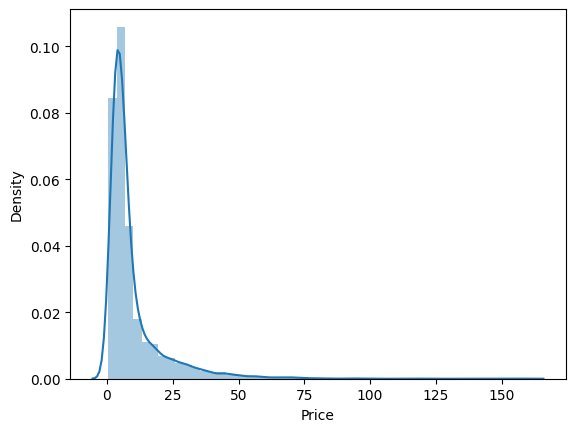

In [35]:
sns.distplot(data['Price'])

print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

We can observe that the distribution of prices shows a high positive skewness to the left (skew > 1). A kurtosis value of 17 is very high, meaning that there is a profusion of outliers in the dataset

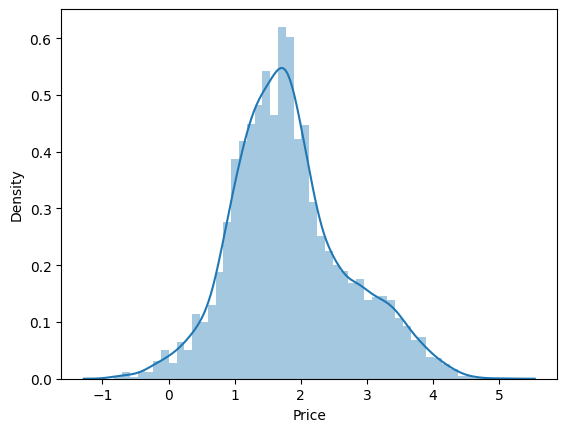

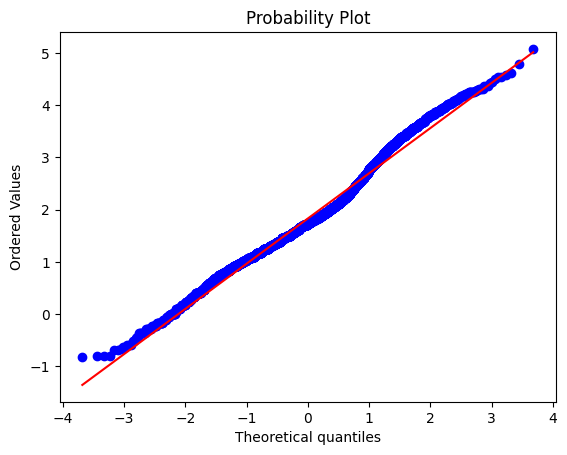

In [36]:
#applying log transformation
data['Price'] = np.log(data['Price'])
#transformed histogram and normal probability plot
#sns.distplot(data['Price']);
sns.distplot(data['Price'], fit=None);
fig = plt.figure()
res = stats.probplot(data['Price'], plot=plt)

We found that converting the value of Price to Log(Price) might be a good solution to have a more normal visualization of the distribution of the Price, however, this alternative has no major or decisive effect on the results of the train and/ or predict procedure in the next section. Therefore, in order not to complicate matters, we decided to keep the whole processed database up to this step to analyze the parameters' correlations and conduct the modeling in the following section.

RELATIONSHIP OF PRICE WITH OTHER PARAMETER

In [38]:
# Find most important features relative to target Price
print("Find most important features relative to Price-target")
numerical_data = data.select_dtypes(include=['number'])

corr = numerical_data.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print(corr.Price)

Find most important features relative to Price-target
Price                1.000000
Power                0.755995
Engine               0.687712
Year                 0.503999
Seats                0.163818
Kilometers_Driven   -0.047187
Mileage             -0.265965
Name: Price, dtype: float64


In [39]:
px.treemap(data.groupby(by='Fuel_Type').sum().reset_index(), path=['Fuel_Type'], labels='Fuel_Type',
           values='Price', title='Price vs Fuel_type')

Diesel vehicles are the majority

In [40]:
yprop = 'Price'
xprop = 'Power'
h= 'Fuel_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [41]:
yprop = 'Price'
xprop = 'Engine'
h= 'Transmission'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

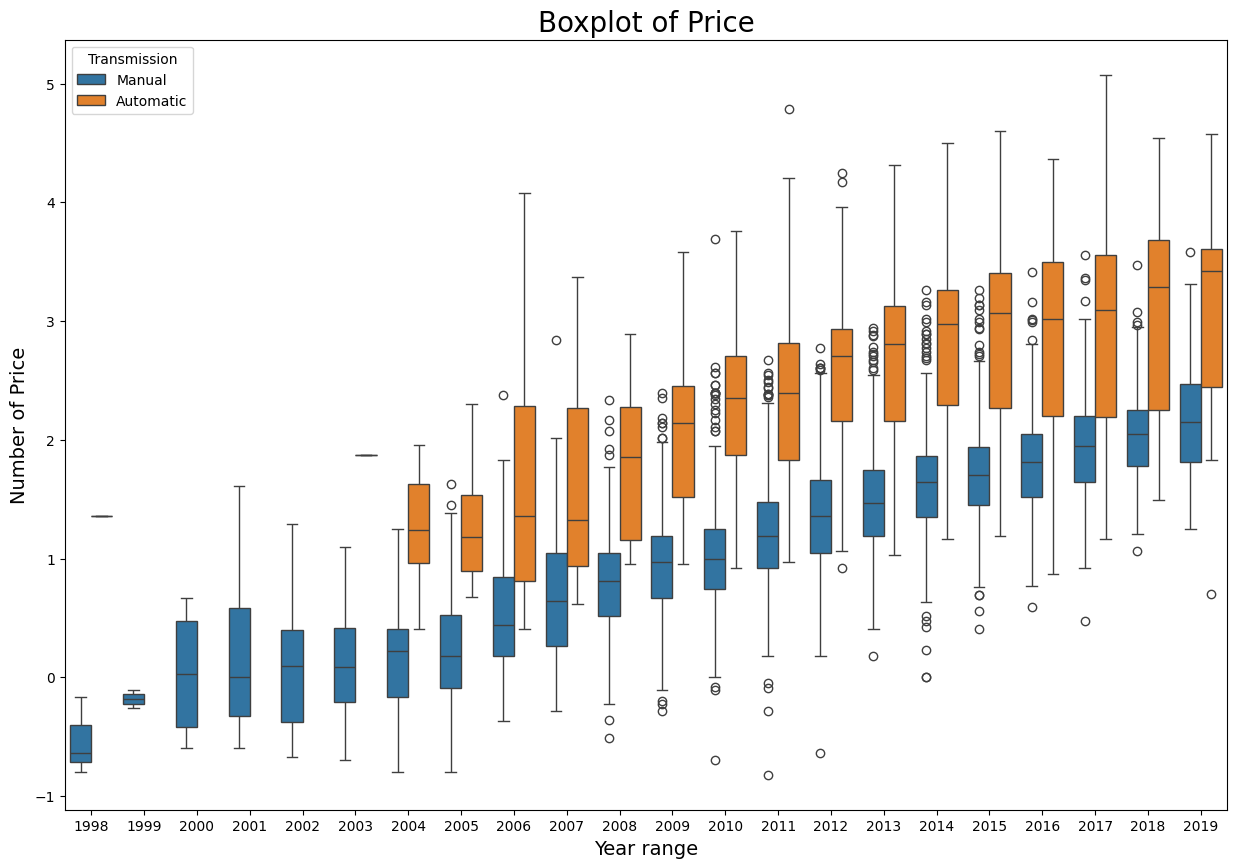

In [42]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Transmission')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

"New" cars are more expensive than "Old" cars, and Automatic cars are more costly.

In [44]:
yprop = 'Price'
xprop = 'Year'
h= 'Owner_Type'
px.scatter(data, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

 the THIRD OWNER' CARS are sometime more expensive than the second-hand

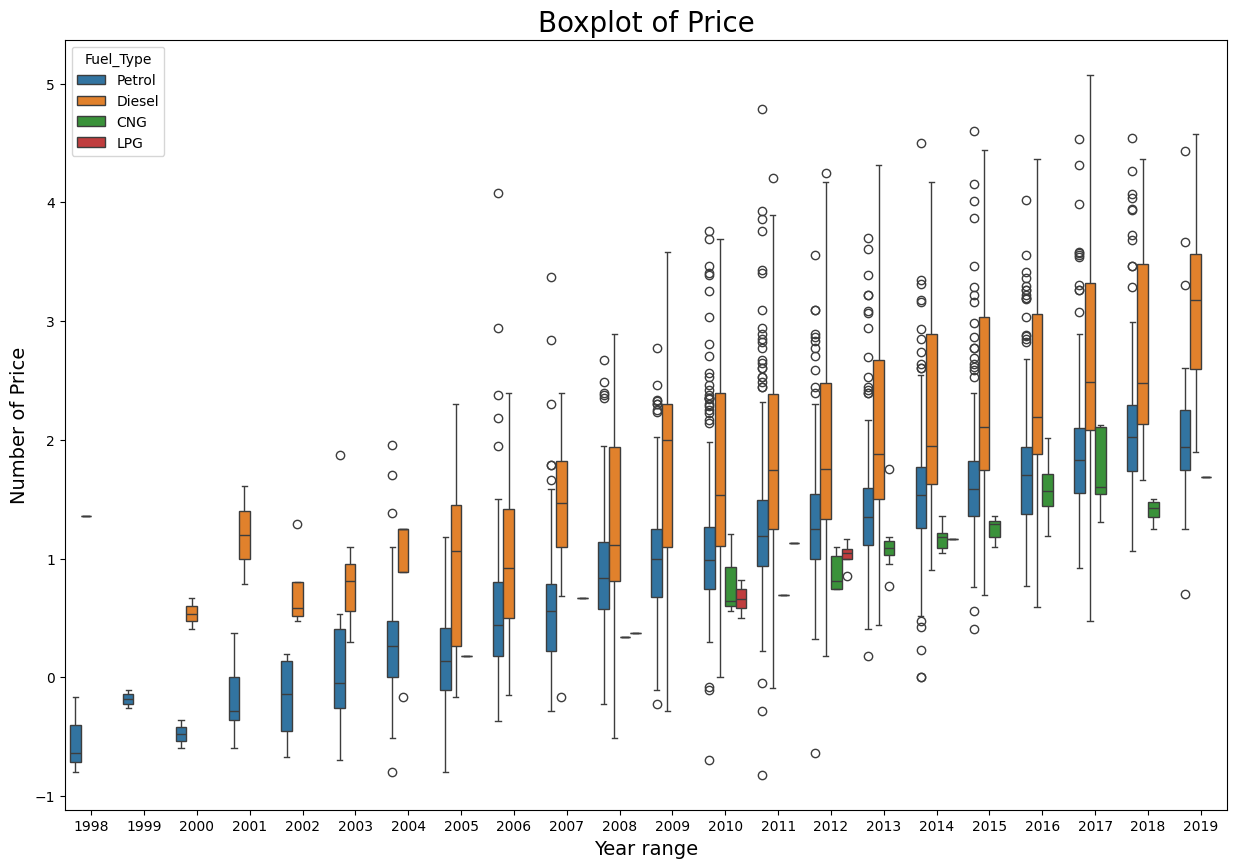

In [45]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=data, x=xprop, y=yprop, hue='Fuel_Type')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [46]:
fig = px.box(data, x='Fuel_Type',y='Price', color='Transmission', notched=True)
fig.update_layout(legend=dict(orientation="h",yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

Again, this confirmed that the Petrol vehicle is cheaper than the Diesel.



In [47]:
px.violin(data, y='Price', x='Seats', color=None, box=True, points="all", hover_data=data.columns)

In [48]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=data['Fuel_Type'], values=data['Price'], hole=.3)])
fig.update_layout(legend=dict(orientation="h", yanchor="bottom",y=1.02,xanchor="right",x=1))
fig.show()

IV. MODEL BUILDING

A. Data preparation & Model Parameters

In [49]:
import copy
df_train=copy.deepcopy(data)
df_test=copy.deepcopy(test)

cols=np.array(data.columns[data.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
        df_test[i]=df_test[i].map(str)
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=np.delete(cols,len(cols)-1),inplace=True)

And then, coding the categorical parameters using LabelEncoder.

In [50]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(data.columns[data.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_test = df_test.apply(lambda x: d[x.name].transform(x))
df_train[cols] = data[cols]
df_test[np.delete(cols,len(cols)-1)]=test[np.delete(cols,len(cols)-1)]

In [51]:
df_test.head()

Cars  Location  Fuel_Type  Transmission  Owner_Type  Year  \
0   106         4          0             1           0  2014   
1   106         3          3             1           2  2013   
2   197         9          1             1           0  2017   
3   195         5          1             1           0  2012   
4    78         9          3             1           0  2014   

   Kilometers_Driven  Mileage  Engine   Power  Seats  
0              40929    32.26   998.0   58.20    4.0  
1              54493    24.70   796.0   47.30    5.0  
2              34000    13.68  2393.0  147.80    7.0  
3             139000    23.59  1364.0  112.00    5.0  
4              29000    18.50  1197.0   82.85    5.0

In [52]:
df_train.head()

Cars  Location  Fuel_Type  Transmission  Owner_Type  Year  \
0   124         9          0             1           0  2010   
1    65        10          1             1           0  2015   
2    60         2          3             1           0  2011   
3   112         2          1             1           0  2012   
4     2         3          1             0           2  2013   

   Kilometers_Driven  Mileage  Engine   Power  Seats     Price  
0              72000    26.60   998.0   58.16    5.0  0.559616  
1              41000    19.67  1582.0  126.20    5.0  2.525729  
2              46000    18.20  1199.0   88.70    5.0  1.504077  
3              87000    20.77  1248.0   88.76    7.0  1.791759  
4              40670    15.20  1968.0  140.80    5.0  2.875822

B. Training and Testing

We split our dataset into training, testing data with a 70:30 split ratio. The splitting was done by picking at random which results in a balance between the training data and testing data amongst the whole dataset. This is done to avoid overfitting and enhance generalization. Finaly, we selected 11 characters in the dataset to train the model.

In [53]:
ftrain = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission','Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats','Price']

def Definedata():
    # define dataset
    data2 = df_train[ftrain]
    X = data2.drop(columns=['Price']).values
    y0 = data2['Price'].values
    lab_enc = preprocessing.LabelEncoder()
    y = lab_enc.fit_transform(y0)
    return X, y

Now, we create different functions to calculate deviations, important features and graphical illustration.

In [54]:
def Models(models):

    model = models
    X, y = Definedata()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_total = model.predict(X)

    print("\t\tError Table")
    print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Accuracy on Traing set   : ', model.score(X_train,y_train))
    print('Accuracy on Testing set  : ', model.score(X_test,y_test))
    return y_total, y

def Featureimportances(models):
    model = models
    model.fit(X_train,y_train)
    importances = model.feature_importances_
    features = df_test.columns[:9]
    imp = pd.DataFrame({'Features': ftest, 'Importance': importances})
    imp['Sum Importance'] = imp['Importance'].cumsum()
    imp = imp.sort_values(by = 'Importance')
    return imp

def Graph_prediction(n, y_actual, y_predicted):
    y = y_actual
    y_total = y_predicted
    number = n
    aa=[x for x in range(number)]
    plt.figure(figsize=(25,10))
    plt.plot(aa, y[:number], marker='.', label="actual")
    plt.plot(aa, y_total[:number], 'b', label="prediction")
    plt.xlabel('Price prediction of first {} used cars'.format(number), size=15)
    plt.legend(fontsize=15)
    plt.show()

Firstly, take a quick look at the correlation matrix.

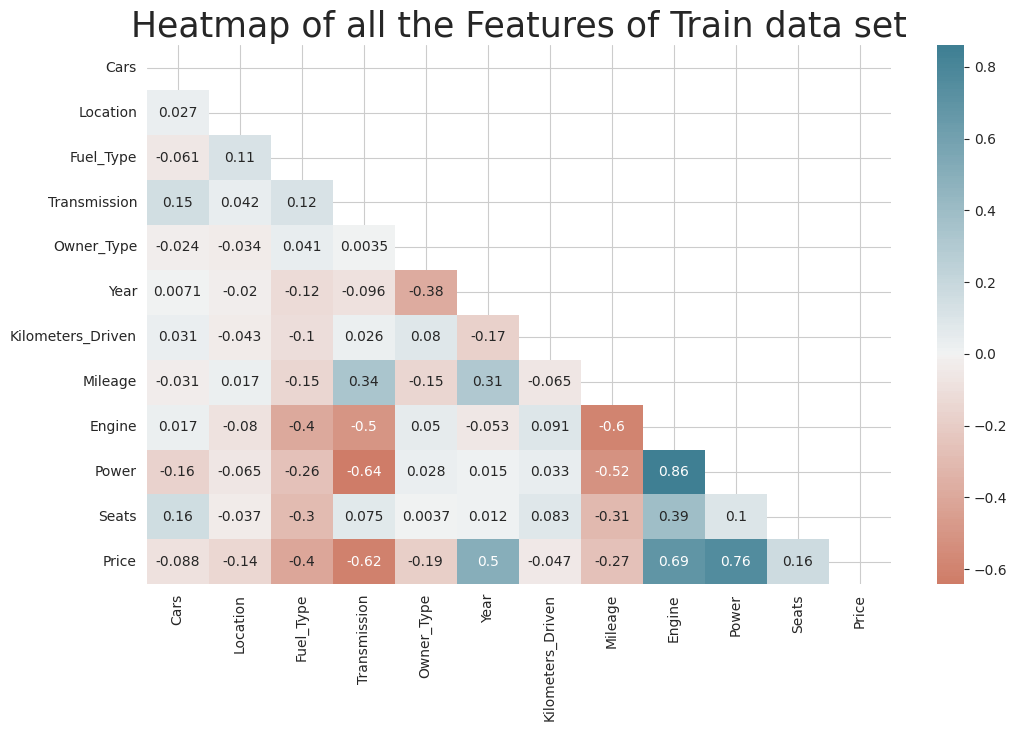

In [57]:
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (12,7))
## Plotting heatmap. # Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(df_train.corr(), dtype=bool) # Use the built-in bool type
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df_train.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Heatmap of all the Features of Train data set", fontsize = 25);

C. Models comparison

The model score is the coefficient of determination R2 of the prediction. In total, we have examinated 9 models to train/predict the used cars price.

In [58]:
Acc = pd.DataFrame(index=None, columns=['model','Root Mean Squared  Error','Accuracy on Traing set','Accuracy on Testing set'])

In [64]:
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 25)

# Initialize an empty list to store results
results = []

regressors = [['DecisionTreeRegressor',DecisionTreeRegressor()],
              ['XGBRegressor', XGBRegressor()],
              ['RandomForestRegressor', RandomForestRegressor()],
              ['MLPRegressor',MLPRegressor()],
              ['AdaBoostRegressor',AdaBoostRegressor()],
              ['ExtraTreesRegressor',ExtraTreesRegressor()]]

for mod in regressors:
    name = mod[0]
    model = mod[1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    ATrS =  model.score(X_train,y_train)
    ATeS = model.score(X_test,y_test)

    # Append results to the list as a dictionary
    results.append({'model':name, 'Root Mean Squared  Error': RMSE,'Accuracy on Traing set':ATrS,'Accuracy on Testing set':ATeS})

# Create the DataFrame after the loop
Acc = pd.DataFrame(results)

In [65]:
Acc.sort_values(by='Accuracy on Testing set')

model  Root Mean Squared  Error  Accuracy on Traing set  \
3           MLPRegressor                201.176207                0.714979   
4      AdaBoostRegressor                150.415512                0.826838   
0  DecisionTreeRegressor                115.619685                0.999993   
2  RandomForestRegressor                 83.320794                0.991606   
5    ExtraTreesRegressor                 79.975280                0.999993   
1           XGBRegressor                 73.528958                0.994569   

   Accuracy on Testing set  
3                 0.662960  
4                 0.811586  
0                 0.888675  
2                 0.942186  
5                 0.946735  
1                 0.954976

		Error Table
Mean Absolute Error      :  56.00212228954627
Mean Squared  Error      :  6235.324498787585
Root Mean Squared  Error :  78.96407093601232
Accuracy on Traing set   :  0.9926183691890602
Accuracy on Testing set  :  0.9480736540488549


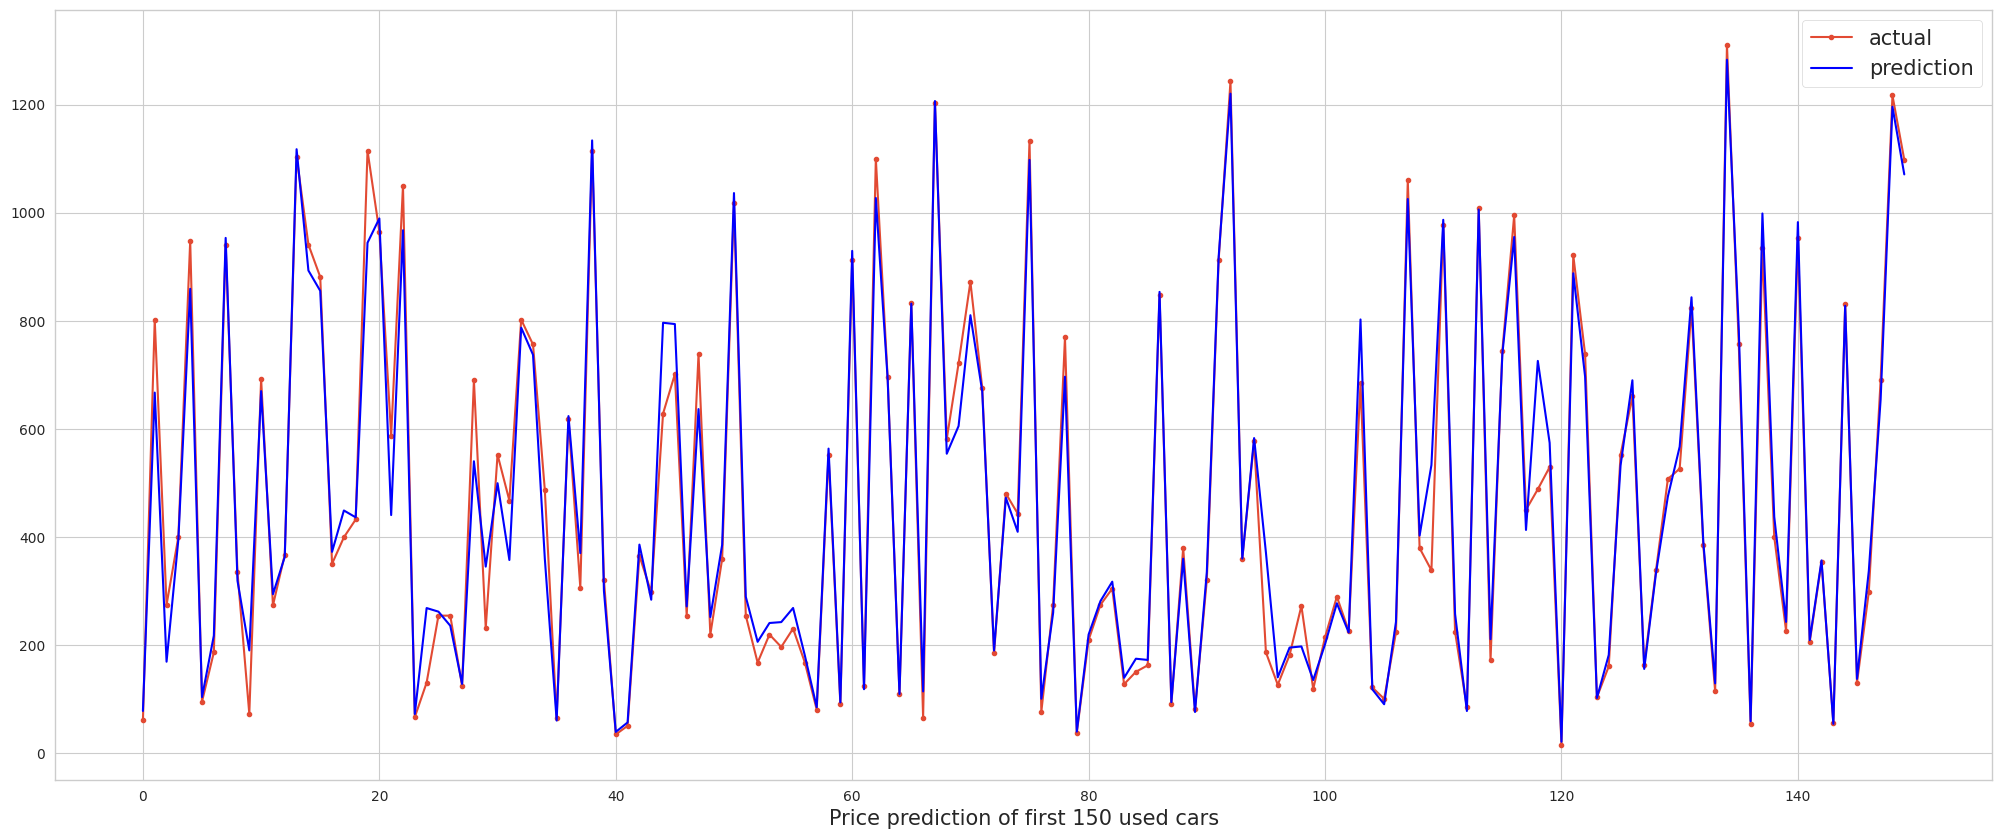

In [66]:
y_predicted, y_actual = Models(RandomForestRegressor(n_estimators=10000,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=25))
Graph_prediction(150, y_actual, y_predicted)

		Error Table
Mean Absolute Error      :  47.05285207381301
Mean Squared  Error      :  4775.906080512007
Root Mean Squared  Error :  69.10793066292759
Accuracy on Traing set   :  0.9947381034525249
Accuracy on Testing set  :  0.9602273544199561


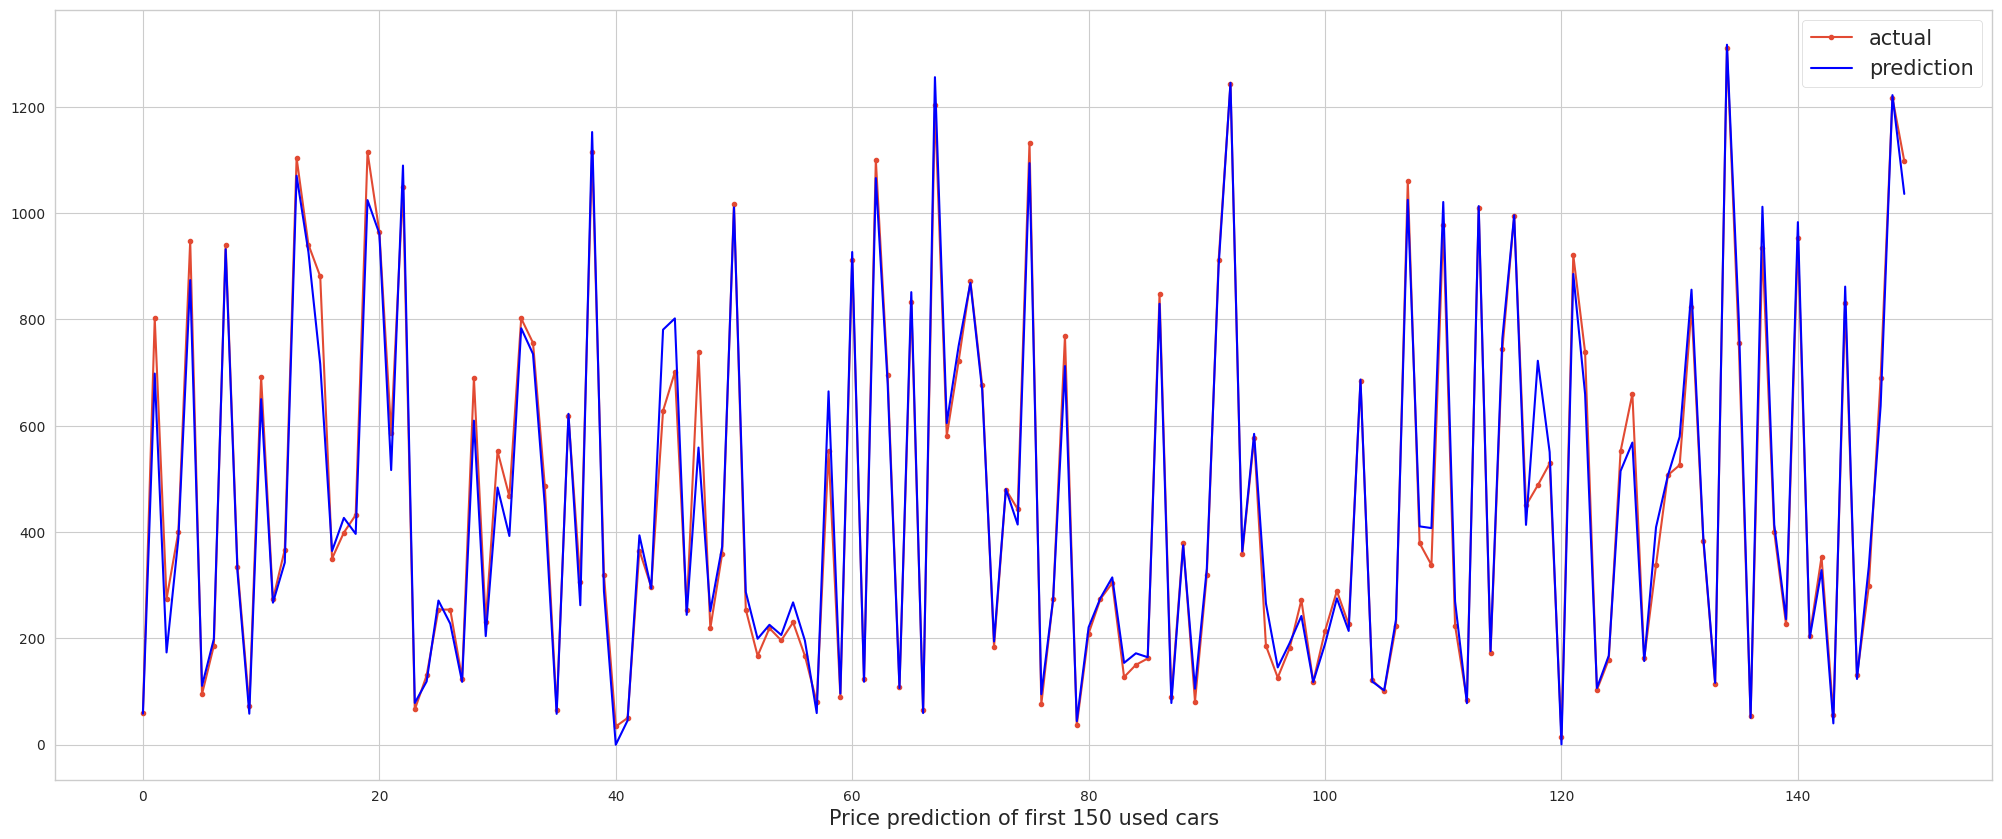

In [67]:
y_predicted, y_actual = Models(GradientBoostingRegressor(random_state=21, n_estimators=3000))
Graph_prediction(150, y_actual, y_predicted)

In [68]:
y_predicted, y_actual = Models(CatBoostRegressor(iterations= 10000, learning_rate= 0.02, random_state= 60))

Streaming output truncated to the last 5000 lines.
5006:	learn: 32.4534811	total: 18.8s	remaining: 18.8s
5007:	learn: 32.4487354	total: 18.8s	remaining: 18.8s
5008:	learn: 32.4461741	total: 18.8s	remaining: 18.8s
5009:	learn: 32.4427340	total: 18.8s	remaining: 18.8s
5010:	learn: 32.4401668	total: 18.8s	remaining: 18.8s
5011:	learn: 32.4355673	total: 18.8s	remaining: 18.7s
5012:	learn: 32.4299522	total: 18.8s	remaining: 18.7s
5013:	learn: 32.4275853	total: 18.8s	remaining: 18.7s
5014:	learn: 32.4261427	total: 18.8s	remaining: 18.7s
5015:	learn: 32.4235479	total: 18.8s	remaining: 18.7s
5016:	learn: 32.4212211	total: 18.8s	remaining: 18.7s
5017:	learn: 32.4206676	total: 18.9s	remaining: 18.7s
5018:	learn: 32.4180788	total: 18.9s	remaining: 18.7s
5019:	learn: 32.4131145	total: 18.9s	remaining: 18.7s
5020:	learn: 32.4097851	total: 18.9s	remaining: 18.7s
5021:	learn: 32.4081319	total: 18.9s	remaining: 18.7s
5022:	learn: 32.4059620	total: 18.9s	remaining: 18.7s
5023:	learn: 32.4045124	total: 

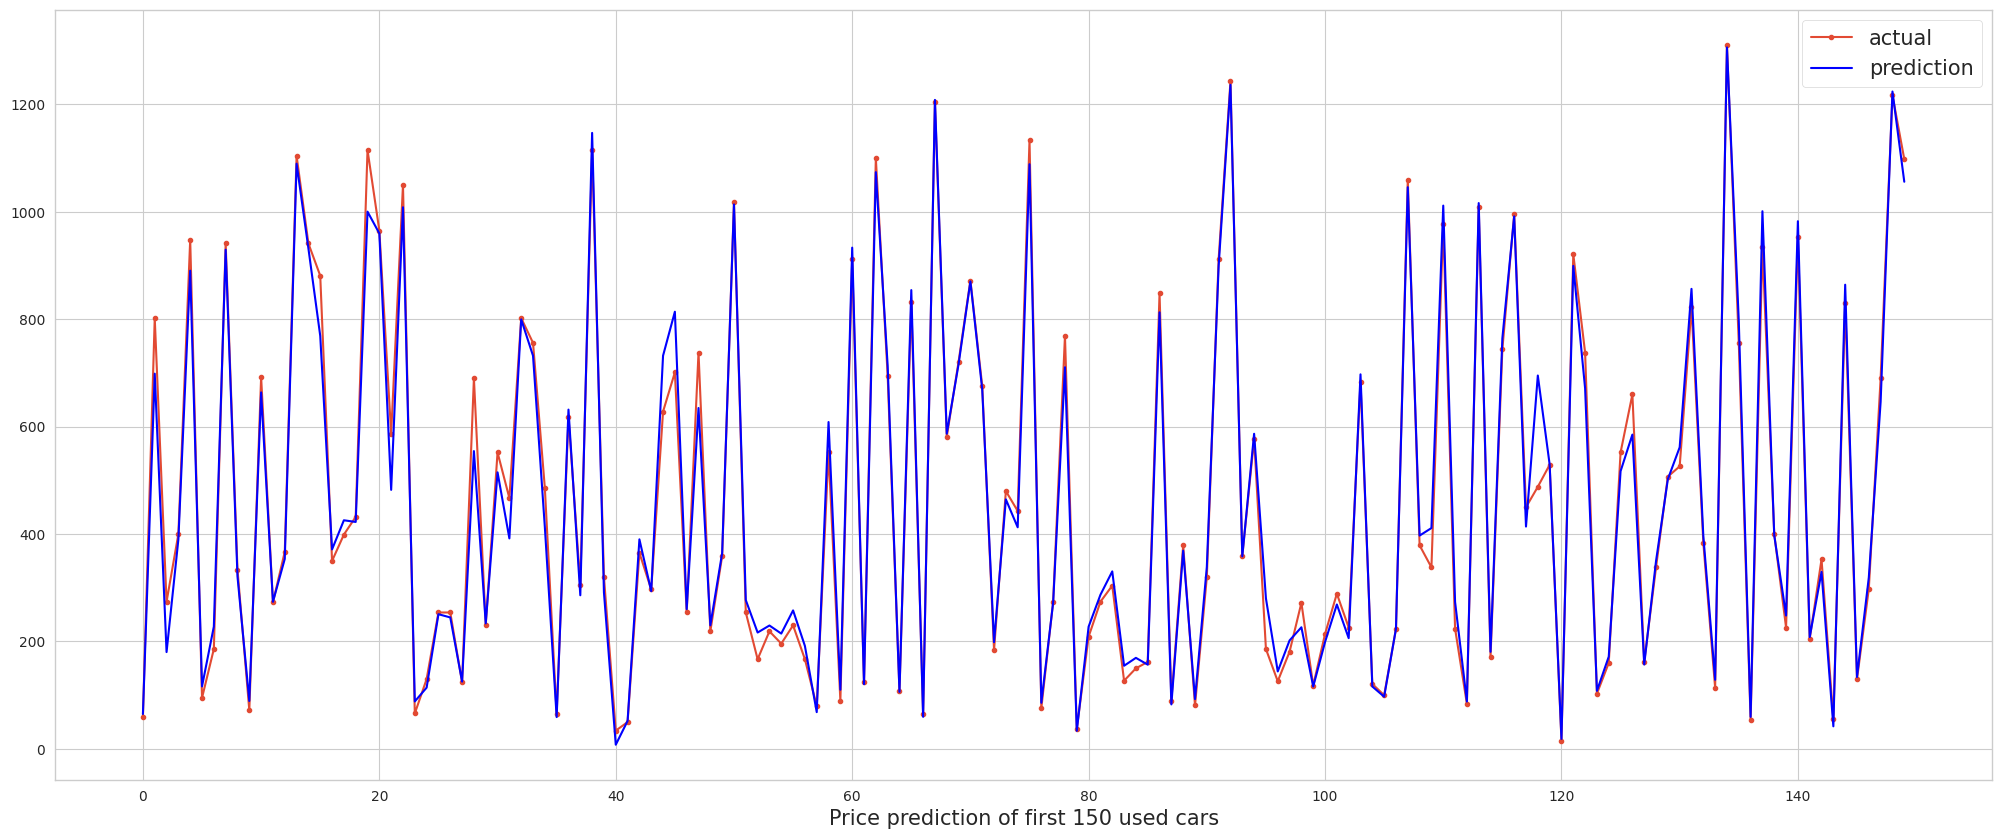

In [69]:
Graph_prediction(150, y_actual, y_predicted)

In [70]:
compare = pd.DataFrame({'Prediction': y_predicted, 'Test Data' : y_actual, 'Abs error': abs(y_actual - y_predicted), 'AAD%': abs(y_actual - y_predicted)/y_actual*100})
compare.head(10)

Prediction  Test Data   Abs error       AAD%
0   64.987943         60    4.987943   8.313238
1  698.647158        802  103.352842  12.886888
2  180.308369        274   93.691631  34.194026
3  390.045724        400    9.954276   2.488569
4  890.317846        948   57.682154   6.084615
5  116.382825         95   21.382825  22.508237
6  227.781281        186   41.781281  22.463054
7  929.365739        941   11.634261   1.236372
8  320.976607        334   13.023393   3.899220
9   89.281981         72   17.281981  24.002752

In [71]:
model = GradientBoostingRegressor(random_state=21, n_estimators=5000)
feature1 = ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
            'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats']

X0 = df_test[feature1]
X, y = Definedata()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)
model.fit(X_train,y_train)
y_predicted = model.predict(X0)

submission = pd.DataFrame({'Car_id':test.index,'Price':y_predicted})
submission.head(10)

Car_id        Price
0       0   229.220688
1       1   157.300412
2       2   933.110908
3       3   237.274792
4       4   273.766839
5       5   758.443125
6       6  1032.597871
7       7   122.656552
8       8   166.785100
9       9   751.605876

V. CONCLUSION

This Notebook evaluates used-car price prediction using Kaggle dataset which gives the best accuracy of 96.2% for test data and 99.1% for train-data. Being a sophisticated model, GradientBoostingRegressor gives the BEST accuracy in comparison to all prior works using these datasets.

VI. FUTURE WORKS

Keeping the current model as a baseline, we intend to use some advanced techniques algorithms to predict car prices as our future work. We intend to develop a fully automatic, interactive system that contains a repository of used-cars with their prices. This enables a user to know the price of a similar car using a recommendation engine, which we would work in the future.